In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('income.csv')

In [24]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


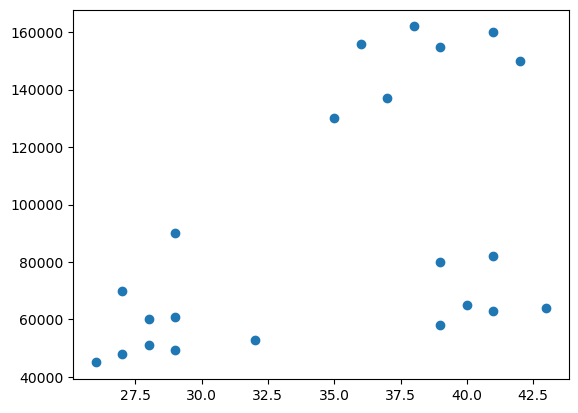

In [25]:
plt.scatter(df['Age'],df['Income($)'])

In [26]:
km = KMeans(n_clusters=3)

In [27]:
km

KMeans(n_clusters=3)

In [28]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [29]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

Text(0, 0.5, 'Income')

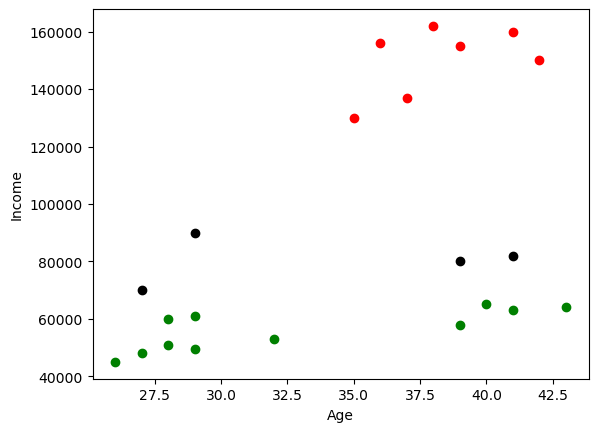

In [12]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income')

In [31]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [32]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [33]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [34]:
df['clusters'] = y_predicted

In [35]:
df.head()

,Name,Age,Income($),cluster,clusters
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,2


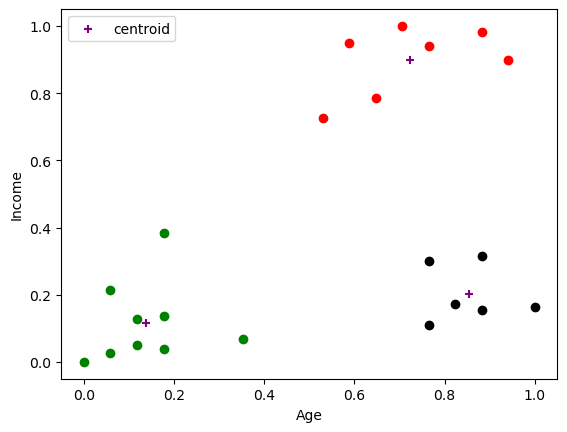

In [18]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [40]:
km.cluster_centers_

array([[0.58823529, 0.75641026],
       [0.35294118, 0.06837607],
       [0.82352941, 0.30769231],
       [0.91176471, 0.94017094],
       [0.13235294, 0.1292735 ],
       [0.17647059, 0.38461538],
       [0.86764706, 0.14957265],
       [0.68627451, 0.96296296],
       [0.05882353, 0.02564103]])

In [42]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [43]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21738833106132674,
 0.1685851223602976,
 0.1397684499538816,
 0.10907864282306068]

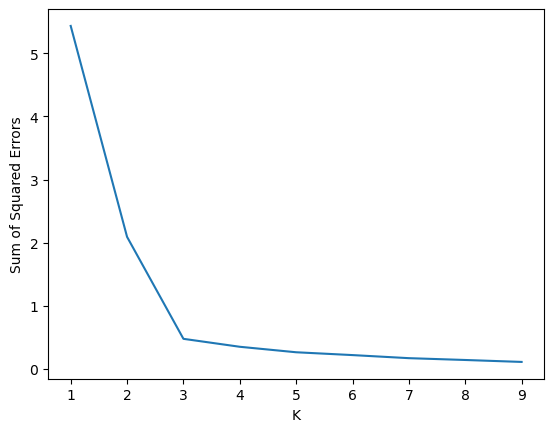

In [45]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)